* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-08-19


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   37   31   74   70   47    74   78  158   54   95   98   95   52
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2   80   87  133  101   44    83   96  164   93  119  144   68  185,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    37   31   74   70   47   74
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2    78  158   54   95   98   95
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    52   80   87  133  101   44
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6    83   96  164   93  119  144
 7   강동구   기타  NaN  NaN  NaN  NaN
 8    68  185  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  성북구사랑제일교회  용인시우리제일교회  양천구되새김교회  노원구안디옥교회  여의도순복음교회  \
 0  2360     377        375         51        11        18         2   
 
    관악구요양병원관련  고양시반석교회(케네디상가)  강서구요양시설관련  리치웨이관련  이태원클럽관련  구로구콜센터관련  \
 0         10              11         26     119      139        98   
 
    타 시·도확진자접촉자   기타  경로확인중  
 0           65  768    290  ,
                               

In [5]:
# index the table with covid19 patient data
tables[6]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2360,16047,8.18.,기타,-,확인 중,배정중
1,2359,16053,8.18.,기타,-,확인 중,배정중
2,2358,15958,8.18.,기타,-,확인 중,배정중
3,2357,16023,8.18.,기타,-,확인 중,배정중
4,2356,15955,8.18.,기타,-,확인 중,배정중
...,...,...,...,...,...,...,...
2355,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
2356,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
2357,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
2358,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [6]:
# get number of confirmed cases and numbers of columns
df = table[6]
df.shape

(2360, 7)

In [7]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2360,16047,8.18.,기타,-,확인 중,배정중
1,2359,16053,8.18.,기타,-,확인 중,배정중
2,2358,15958,8.18.,기타,-,확인 중,배정중
3,2357,16023,8.18.,기타,-,확인 중,배정중
4,2356,15955,8.18.,기타,-,확인 중,배정중


In [8]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
print(df_church.shape)
df_church.head()

(614, 7)


,연번,환자,확진일,거주지,여행력,접촉력,조치사항
21,2339,15845,8.18.,노원구,-,성북구 사랑제일교회 관련,배정중
22,2338,미부여,8.18.,도봉구,-,성북구 사랑제일교회 관련,배정중
23,2337,15989,8.18.,강남구,-,성북구 사랑제일교회 관련,배정중
27,2333,15849,8.18.,성북구,-,성북구 사랑제일교회 관련,배정중
28,2332,15893,8.18.,성북구,-,성북구 사랑제일교회 관련,배정중


In [9]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'8_18_'

In [45]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_8_18_.csv'

In [46]:
df.to_csv(file_path, index=False)

In [47]:
# reed the covid dataset
pd.read_csv(file_path)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,2360,16047,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
1,2359,16053,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
2,2358,15958,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
3,2357,16023,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
4,2356,15955,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
...,...,...,...,...,...,...,...,...,...,...,...
2355,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31
2356,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
2357,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30
2358,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30


In [13]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2360,16047,8.18.,기타,-,확인 중,배정중
1,2359,16053,8.18.,기타,-,확인 중,배정중
2,2358,15958,8.18.,기타,-,확인 중,배정중
3,2357,16023,8.18.,기타,-,확인 중,배정중
4,2356,15955,8.18.,기타,-,확인 중,배정중


In [14]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.18.    151
8.15.    146
8.17.    132
8.16.     90
8.14.     73
        ... 
2.7.       1
5.17.      1
4.20.      1
3.3.       1
1.24.      1
Name: 확진일, Length: 180, dtype: int64

In [15]:
df["확진일"].head(4)

0    8.18.
1    8.18.
2    8.18.
3    8.18.
Name: 확진일, dtype: object

In [16]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-08-18
1   2020-08-18
2   2020-08-18
3   2020-08-18
4   2020-08-18
Name: 확진일자, dtype: datetime64[ns]

In [17]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [18]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [19]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,2360,16047,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
1,2359,16053,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
2,2358,15958,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18


## Visualization

In [20]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [21]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

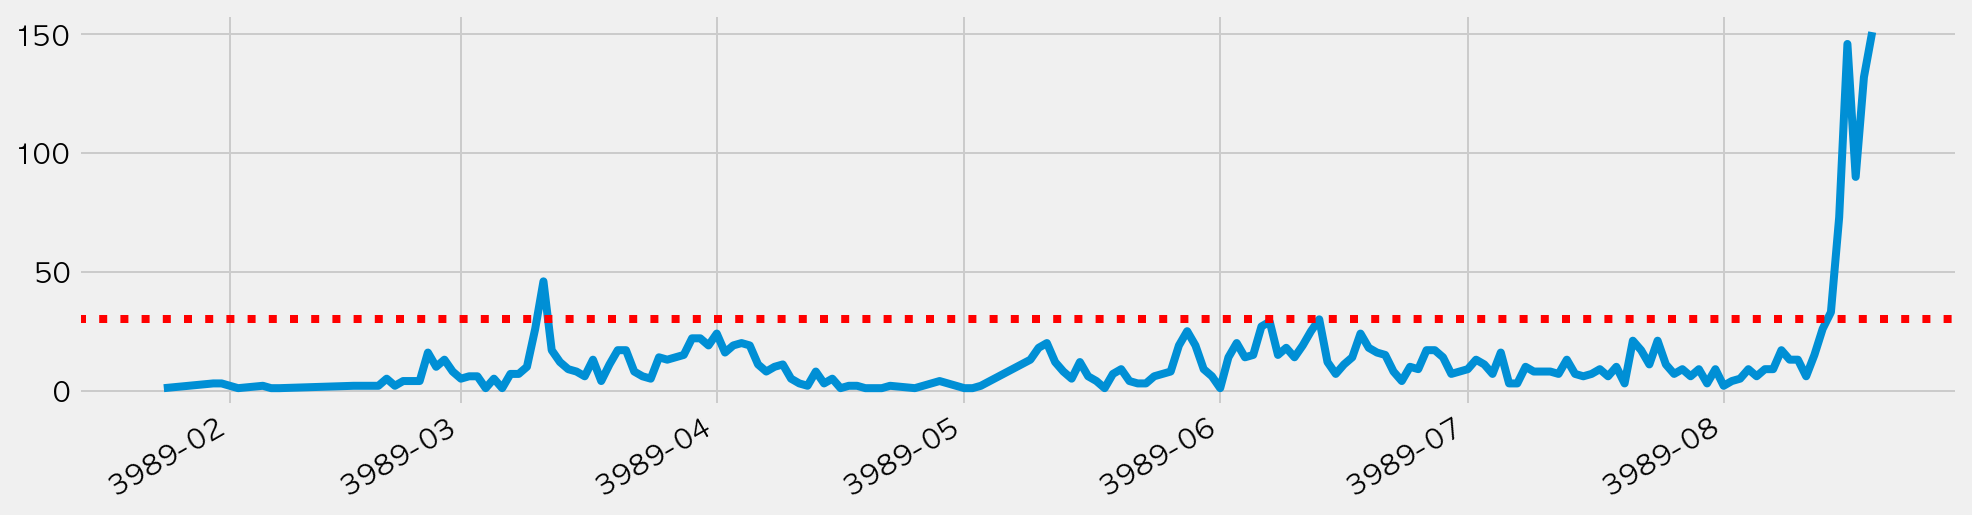

In [22]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [23]:
df.head(4)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,2360,16047,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
1,2359,16053,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
2,2358,15958,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
3,2357,16023,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18


In [24]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    179.000000
mean      13.184358
std       20.054829
min        1.000000
25%        5.000000
50%        9.000000
75%       15.000000
max      151.000000
Name: 월일, dtype: float64

In [49]:
# get 10 days of recent confirmed cases
day_count[-10:]

08-09     13
08-10      6
08-11     15
08-12     26
08-13     33
08-14     73
08-15    146
08-16     90
08-17    132
08-18    151
Name: 월일, dtype: int64

In [50]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-18    151
Name: 월일, dtype: int64

In [52]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-13"]
df_day.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
592,1768,14876,8.13.,은평구,-,은평구 확진자 접촉,은평성모병원,2020-08-13,8,33,08-13
593,1767,14853,8.13.,광진구,-,롯데리아 종사자 모임,서울의료원,2020-08-13,8,33,08-13
594,1766,14846,8.13.,은평구,-,은평구 확진자 접촉,서북병원,2020-08-13,8,33,08-13
595,1765,14848,8.13.,성북구,-,성북구 사랑제일교회 관련,타시도 이관,2020-08-13,8,33,08-13
596,1764,14842,8.13.,강북구,-,성북구 사랑제일교회 관련,보라매병원,2020-08-13,8,33,08-13


In [28]:
# Covid19 infection classified with patients' contact to the disease
df["접촉력"].value_counts().head(20)

성북구 사랑제일교회 관련    373
해외 접촉 추정         354
확인 중             249
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
타시도 확진자 접촉        59
용인시 우리제일교회 관련     51
요양시설 관련           43
양천구 운동시설 관련       43
확인중               42
구로구 교회 관련         41
수도권 개척교회 관련       37
콜센터직원 접촉          37
강남구 사무실 관련        36
왕성교회 관련           30
동대문구 관련           28
부천시 쿠팡 관련         24
해외 접촉             22
송파구 교회관련          19
Name: 접촉력, dtype: int64

In [29]:
# get unique value for types of contagion route 
df["접촉력"].unique()

array(['확인 중', '성북구 사랑제일교회 관련', '광화문 집회', '해외 접촉 추정', '타시도 확진자 접촉', '기타',
       '노원구 안디옥교회', '롯데리아 종사자 모임', '용인시 우리제일교회 관련', '양천구 되새김교회',
       '강동구 확진자 접촉', '강북구 확진자 접촉', '마포구 확진자 접촉', '관악구 확진자 접촉',
       '동대문 확진자 접촉', '#14678 접촉', '노원구 확진자 접촉', '동작구 확진자 접촉',
       '중랑구 확진자 접촉', '성동구 확진자 접촉', '용산구 확진자 접촉', '도봉구 확진자 접촉', '관악구 요양병원',
       '광진구 확진자 접촉', '서초구 확진자 접촉', '여의도 순복음 교회', '동대문구 확진자 접촉',
       '구로구 확진자 접촉', '은평구 확진자 접촉', '고양시 반석교회 관련(케네디상가)', '중구 통일상가',
       '양천구 확진자 접촉', '영등포구 확진자 접촉', '강남구 확진자 접촉', '강남구 판매업소',
       '종로구 확진자 접촉', '성북구 확진자 접촉', '#14483 접촉', '성동구 가족관련', '#14488 접촉',
       '도봉구 가족관련', '강남구 커피전문점', '선교회 소모임', '송파구 교회관련', '강서구 확진자 접촉',
       '송파구 확진자 접촉', '종로구 지인모임 신명투자', '강서구 요양시설관련', '강남구 사무실 K빌딩',
       '송파구 지인모임', '중구 확진자 접촉', '관악구 사무실 관련', '강남구 사무실 관련', '강남역삼동 금융회사',
       '확인중', '강서구 요양시설 관련', '강남구 이동통신 종사자', '강남구 역삼동 모임', '왕성교회 관련',
       '중랑구 일가족 관련', '관악구 일가족 관련', '대전 꿈꾸는 교회', '리치웨이 관련', '금천구 확진자 접촉',
       '요양시설 관련', '시청역 관련', '대자연코리아', '의왕

In [30]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [53]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"
# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [54]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,2360,16047,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
1,2359,16053,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
2,2358,15958,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
3,2357,16023,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
4,2356,15955,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18


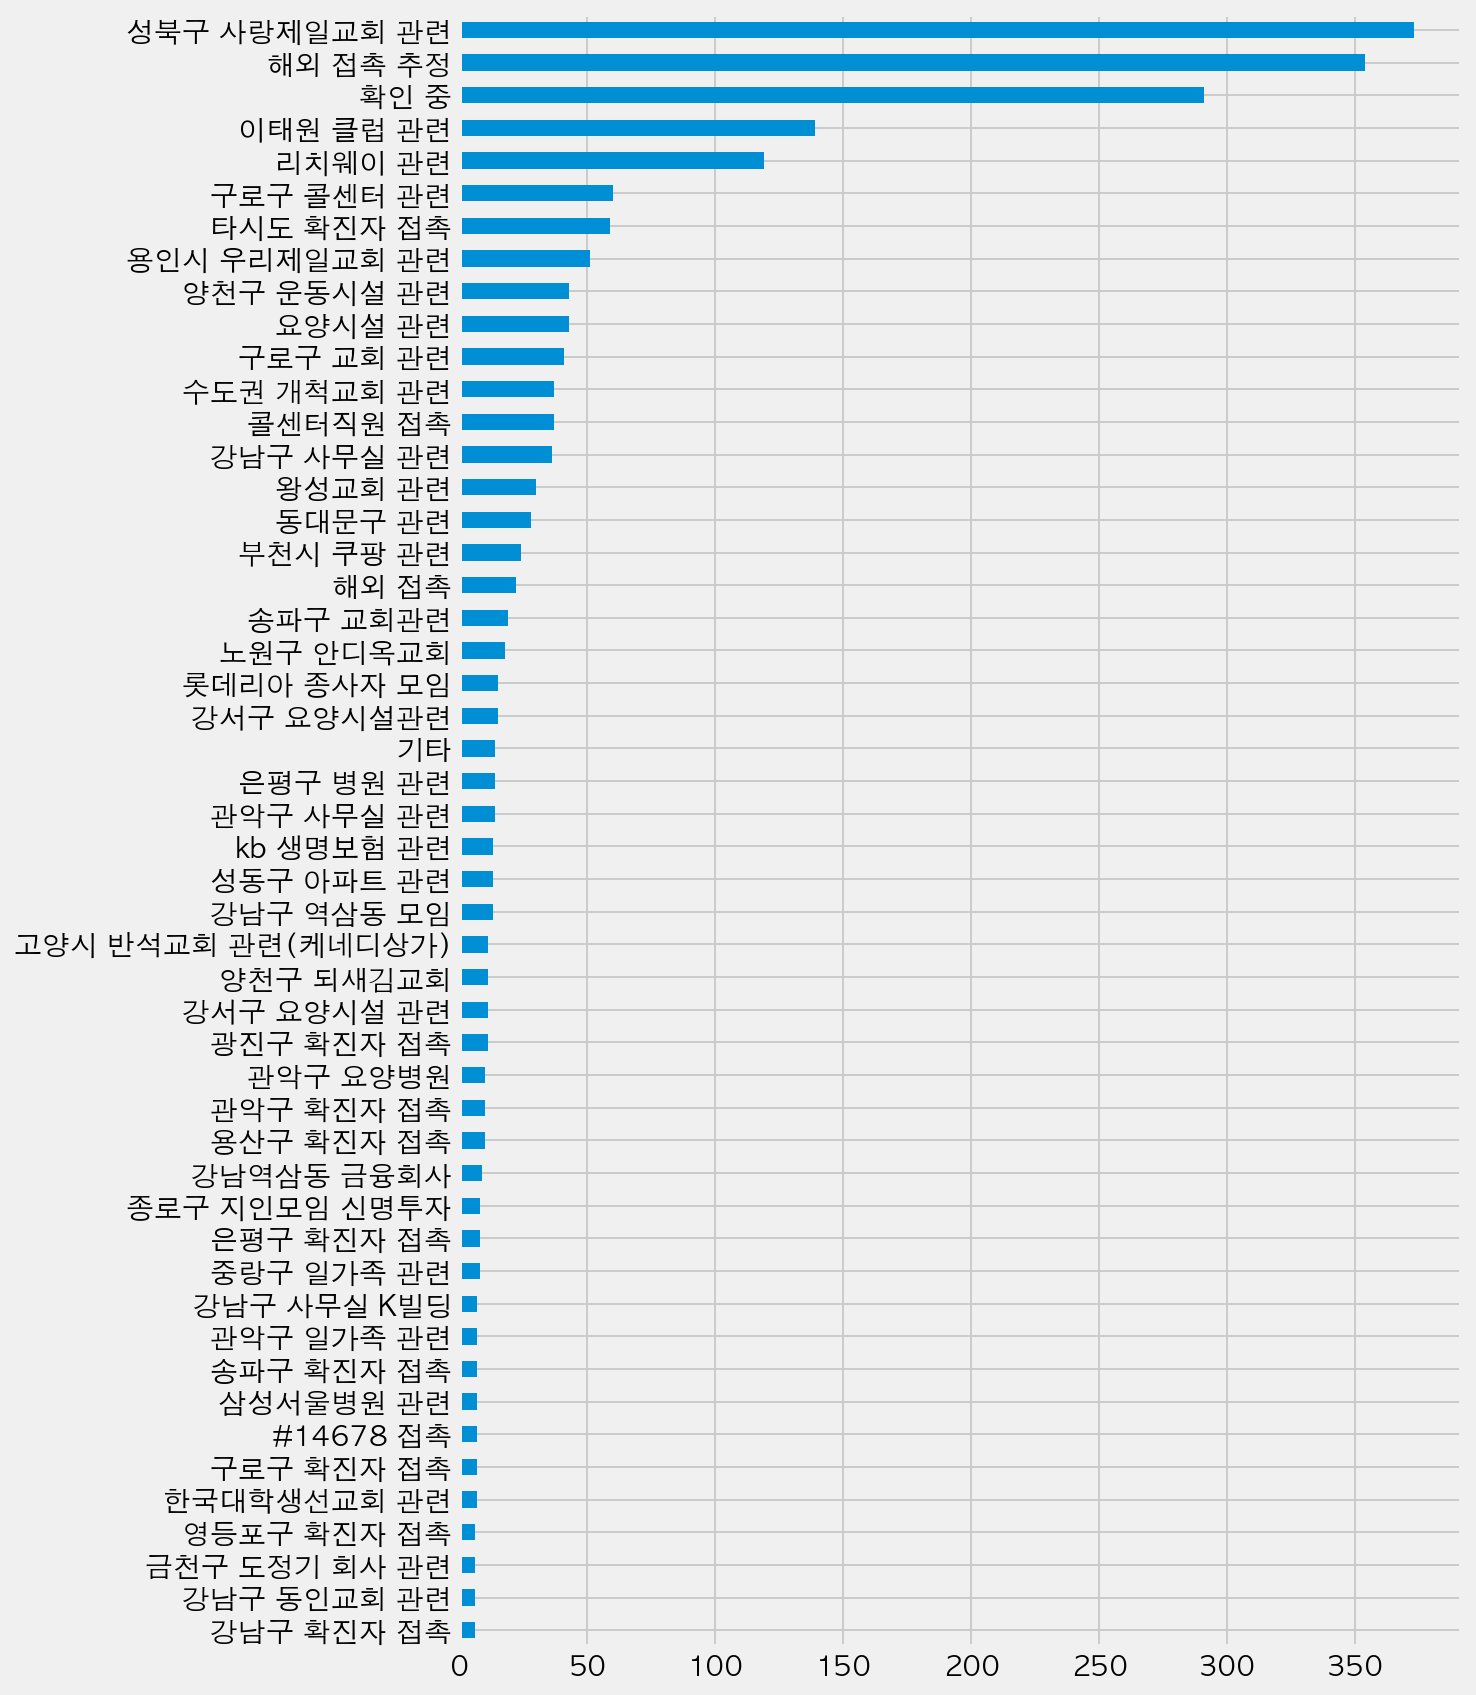

In [55]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(50)
g = contact_count_top.plot.barh(figsize=(8,14))

In [35]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

성북구 사랑제일교회 관련    373
해외 접촉 추정         354
확인 중             291
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
타시도 확진자 접촉        59
용인시 우리제일교회 관련     51
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
수도권 개척교회 관련       37
콜센터직원 접촉          37
강남구 사무실 관련        36
왕성교회 관련           30
Name: 접촉력, dtype: int64

## 감염경로 불명

In [36]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,2360,16047,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
1,2359,16053,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
2,2358,15958,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
3,2357,16023,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
4,2356,15955,8.18.,기타,-,확인 중,배정중,2020-08-18,8,34,08-18
...,...,...,...,...,...,...,...,...,...,...,...
2304,56,1611,2.25.,고양시,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25
2318,42,996,2.25.,노원구,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25
2321,39,907,2.25.,평택시,-,확인 중,타시도 이관(퇴원),2020-02-25,2,9,02-25
2322,38,935,2.25.,관악구,-,확인 중,삼육서울병원(퇴원),2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

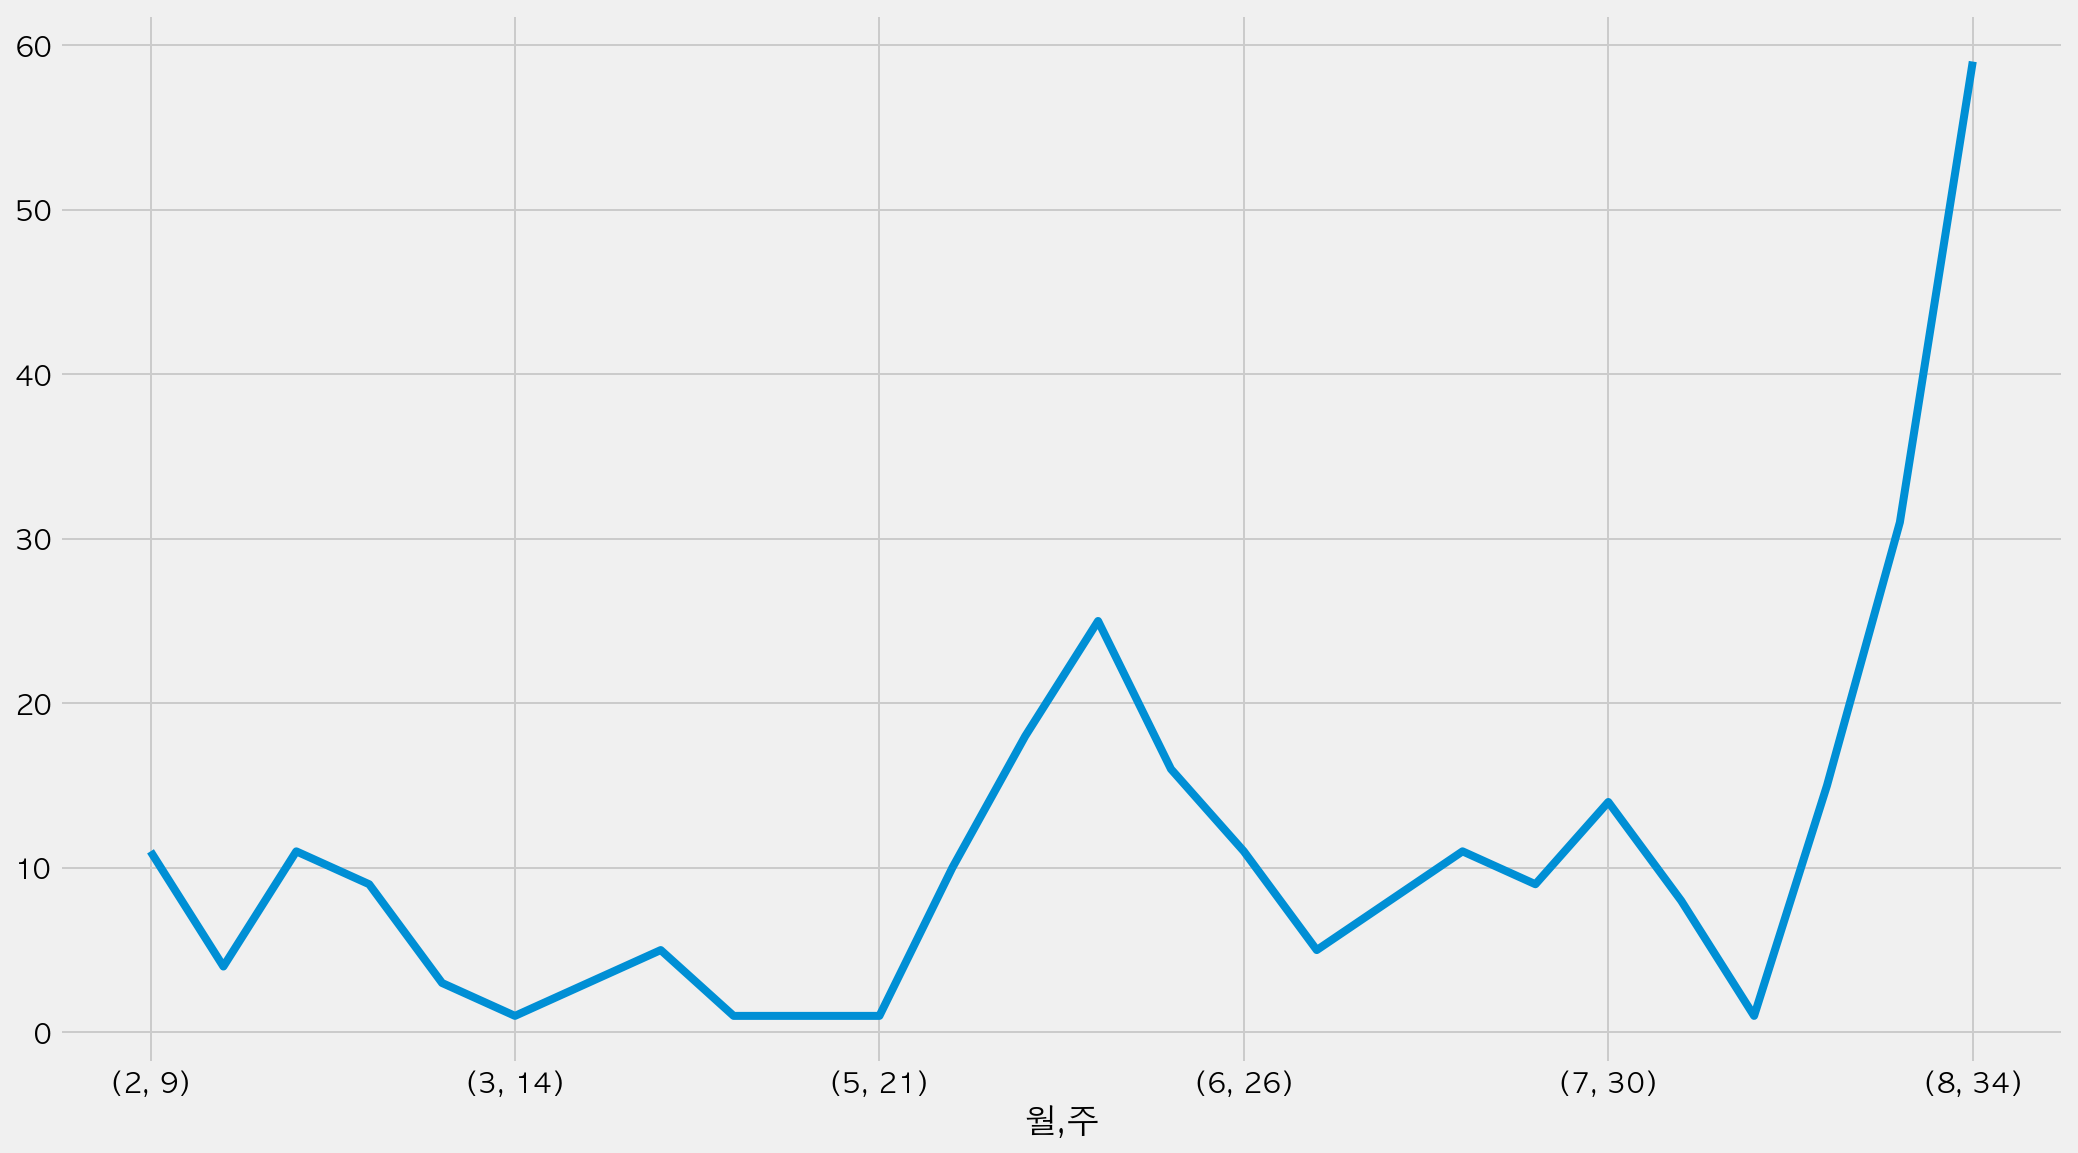

In [37]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [38]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
33,389
34,283
23,134
14,128
24,125


In [39]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
34,59
33,31
24,25
23,18
25,16


In [40]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


<AxesSubplot:>

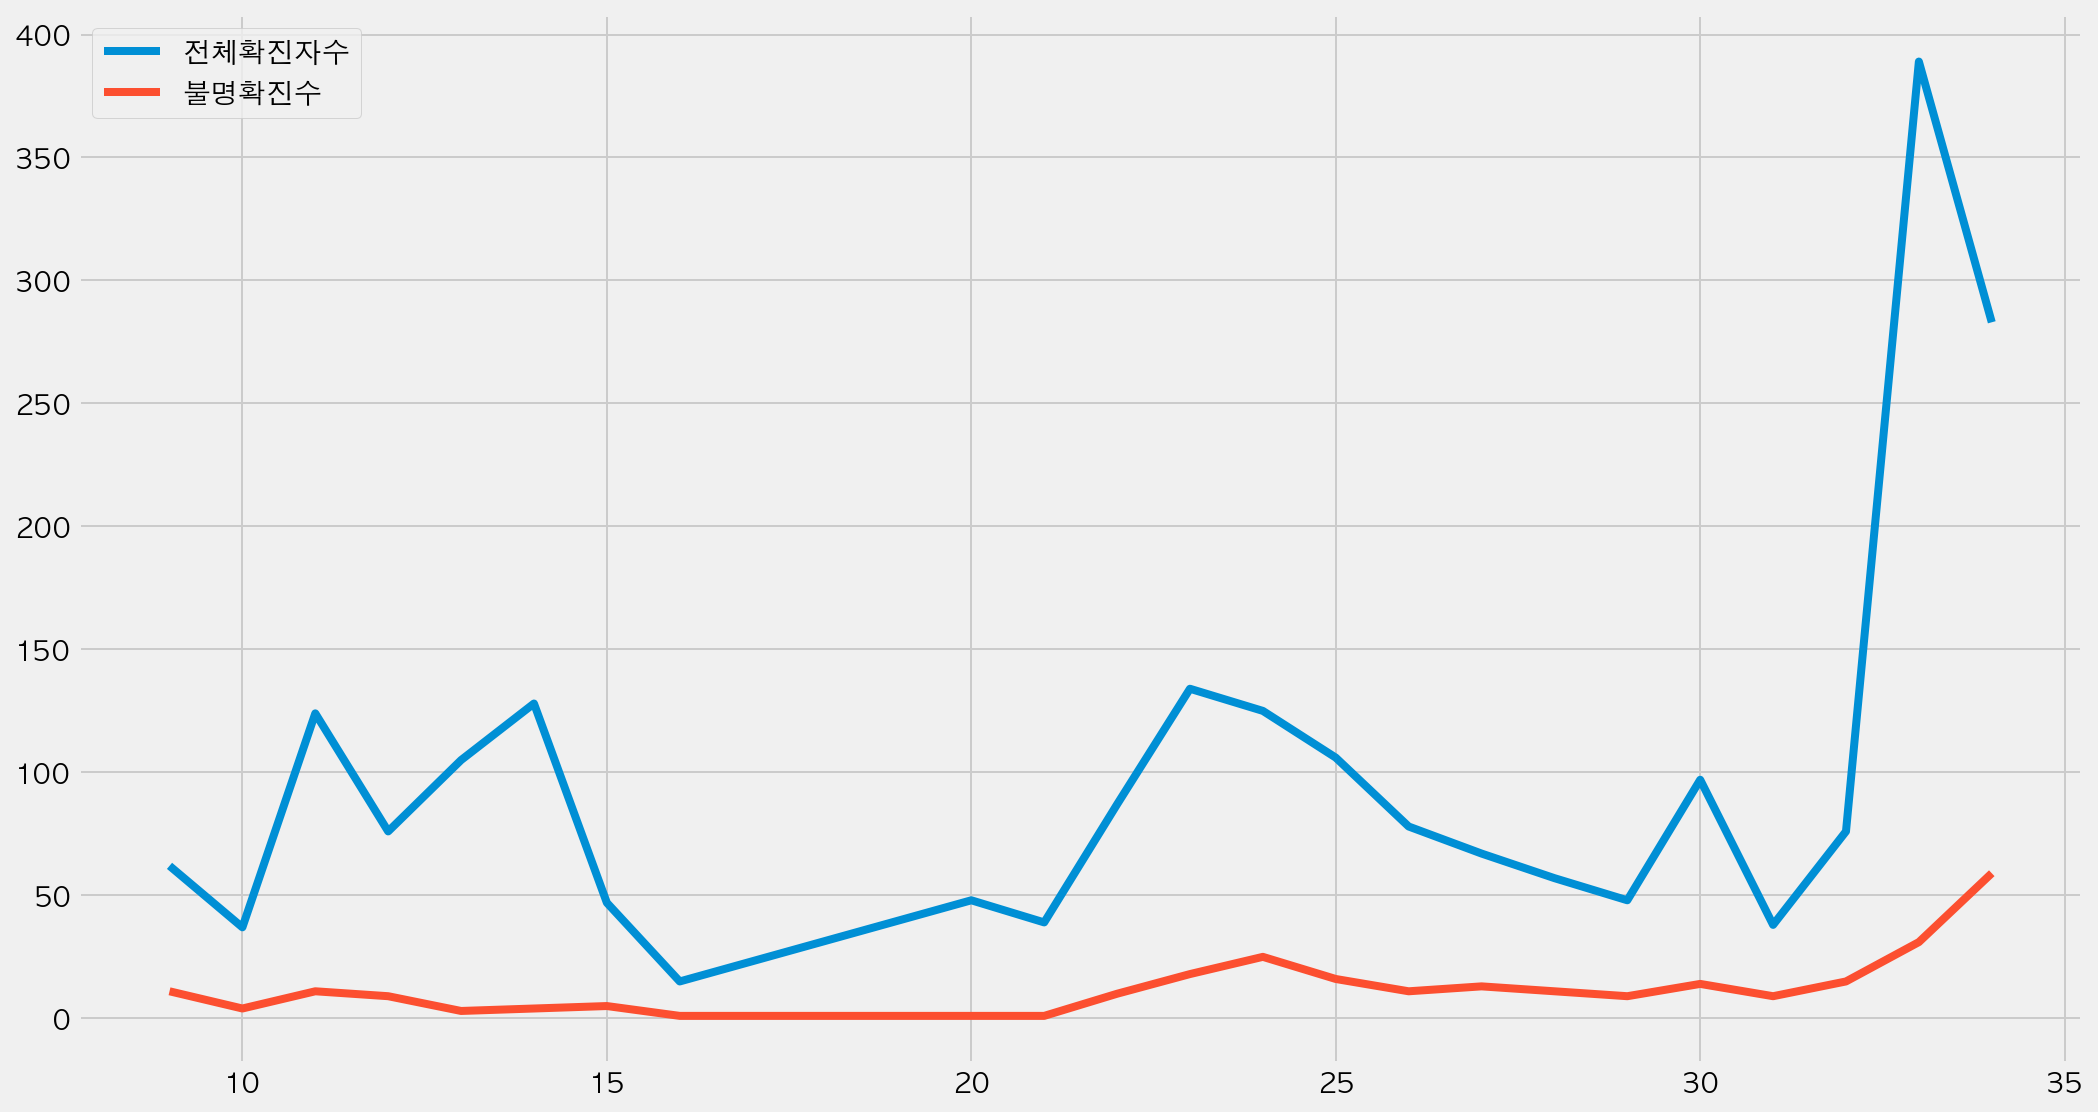

In [41]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph

In [42]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    14.432990
31    23.684211
32    19.736842
33     7.969152
34    20.848057
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
20.848056537102476


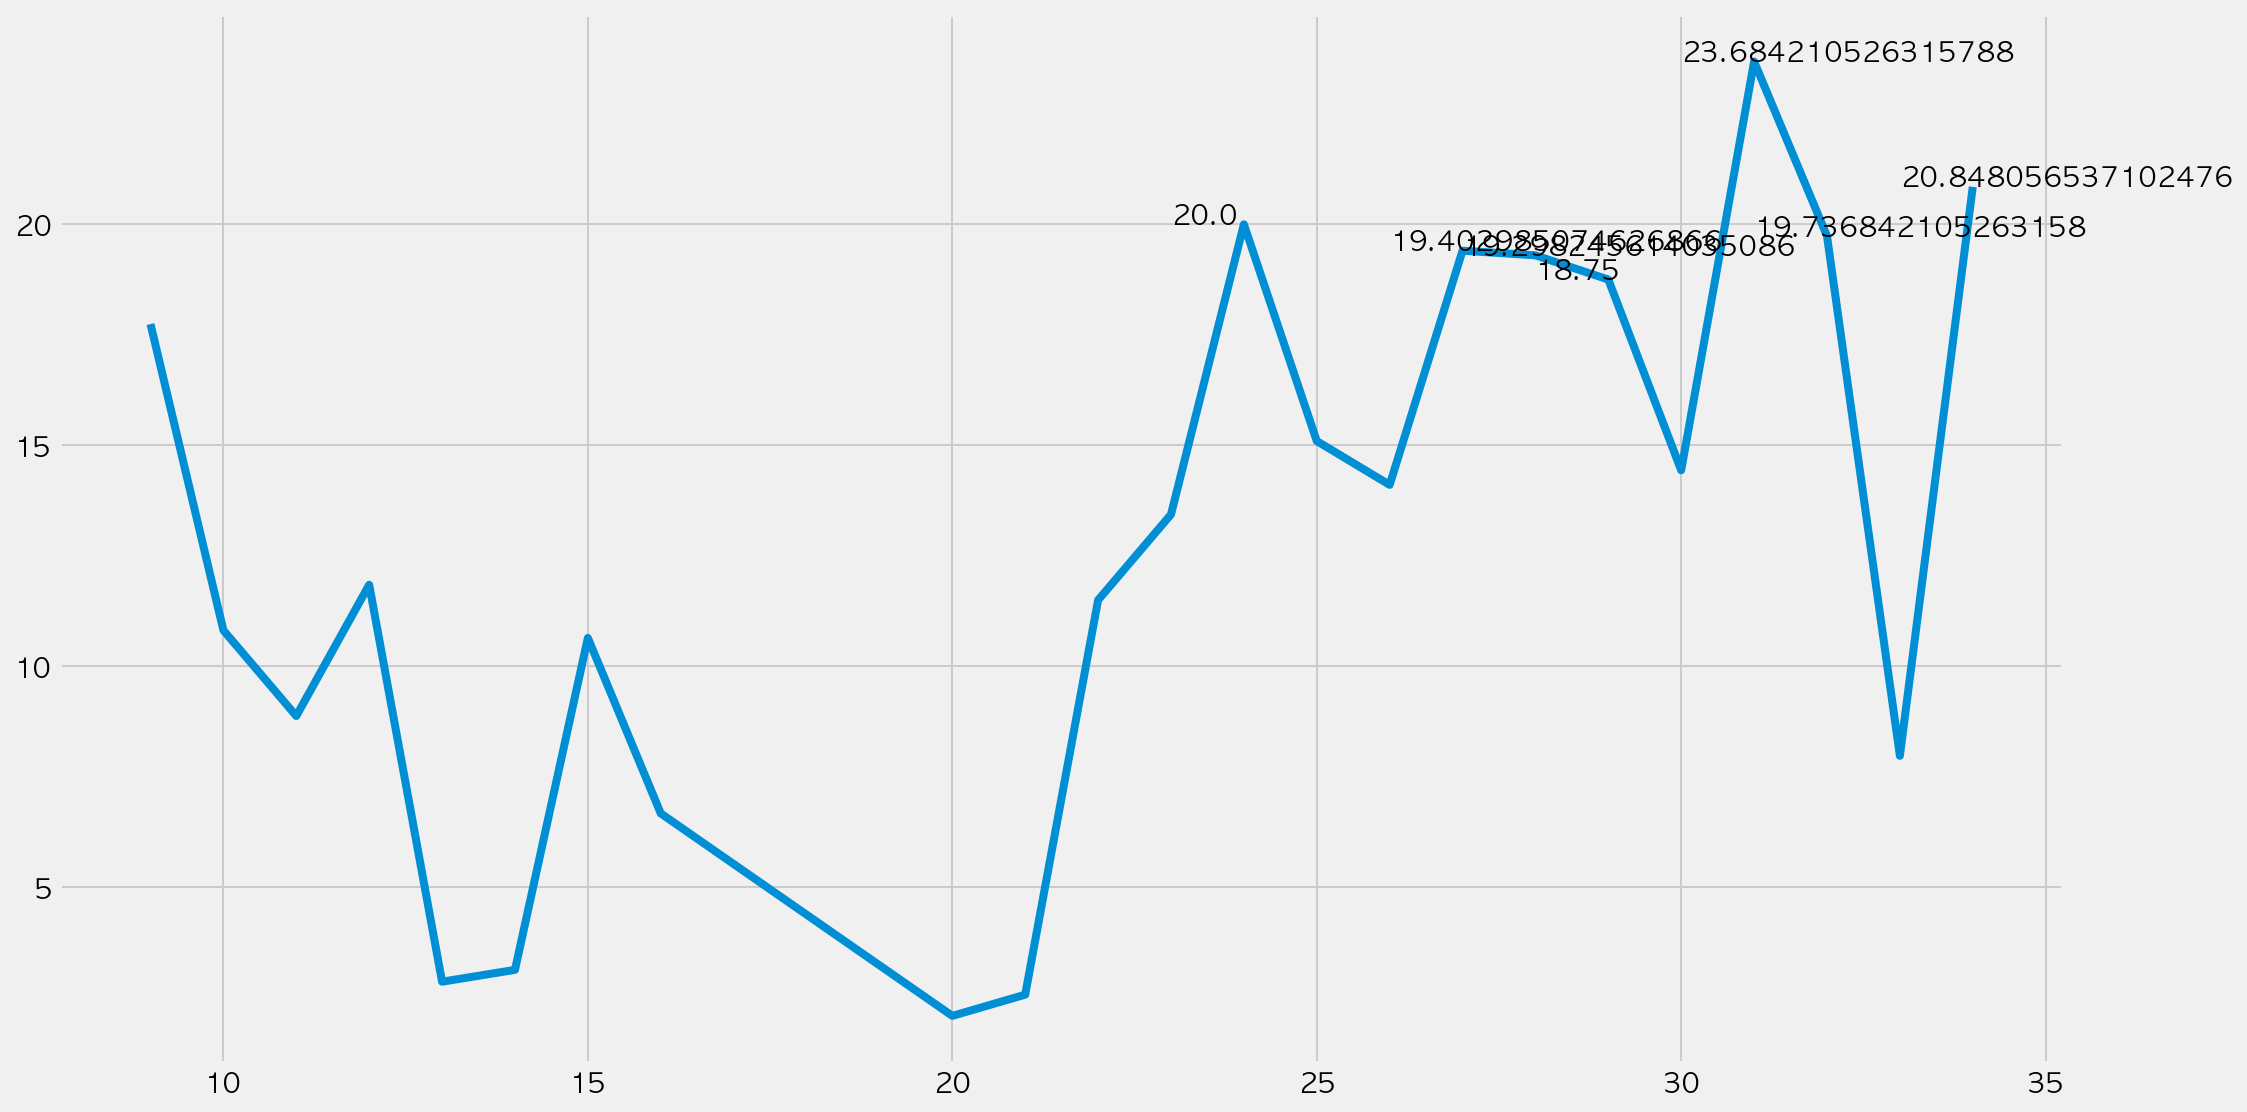

In [43]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percentages.iloc[i], s=percentages.iloc[i])